In [161]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [162]:
path = ('C:/Users/yayat/OneDrive/Documentos/Jeimmy/Universidad/NPL/Taller 8/reviews_vidjew_es.csv')
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [163]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

In [139]:
ks = []
k_inertias = []

for k in range(1,21):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

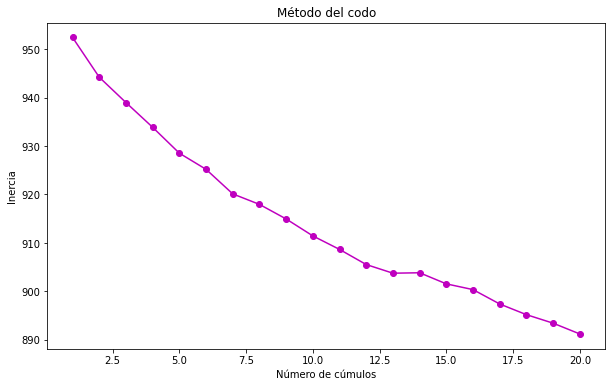

In [140]:
plt.figure(figsize=(10,6))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'mo-');

In [164]:
k =6

model =KMeans(n_clusters=k)
model.fit(tfidf_matrix)


KMeans(n_clusters=6)

In [165]:
data['cluster'] = model.labels_
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,2
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,0
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,1
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,4
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,2
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,3
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,2
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,4
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,4


In [166]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 61 registros (6.10% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
perfecto en todo estado el tiempo de ha la español rápido llegó que con llegado buen es juego me envío 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Todo en perfecto estado

 *** El producto en buen estado. Perfecto.

 *** Llegó a tiempo y en perfecto estado


********************************************

Cluster # 1
Tiene 164 registros (16.40% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
para un regalo le de lo el mi juego no buen fue las es que con como en la hijo 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Fue para un regalo, le ha encantado y llegó de un día para otro.

 *** Fue para un regalo y le encantó

 *** Bonito fue para un regalo y bien


********************************************

Cluster # 2
Tiene 179 registros (17.90% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
muy calidad buena es precio bonito pero el la bien de se un que no queda con para buen poco 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Calidad precio

In [167]:
clusters = {0: 'Pesimo',
            1: "Aceptable",
            2: 'Bueno',
            3: 'Excelente',
            4: 'Satisfecho',
            5: 'Muy bueno'}

data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(2)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,nombres_clusters
393,es_0581325,product_es_0724511,reviewer_es_0334690,5,Llegó el día previsto. Pero la caja un poco ro...,Mikel,es,video_games,5,Muy bueno
597,es_0412722,product_es_0161839,reviewer_es_0301510,5,Llego antes de tiempo. Todo perfeco.,Perfecto,es,video_games,0,Pesimo


In [168]:
df_centroids = pd.DataFrame(centroids)
df_centroids['cluster'] = clusters.values()
df_centroids


,0,1,2,3,4,5,6,7,8,9,...,3820,3821,3822,3823,3824,3825,3826,3827,3828,cluster
0,-2.168404e-19,0.000000e+00,0.000000e+00,-2.710505e-20,1.084202e-19,-1.084202e-19,0.000000e+00,2.710505e-20,-1.626303e-19,0.000000e+00,...,1.190327e-02,-2.710505e-20,5.421011e-20,-5.421011e-20,-5.421011e-20,-1.084202e-19,5.421011e-20,4.336809e-19,4.336809e-19,Pesimo
1,0.000000e+00,6.505213e-19,1.626303e-19,-1.219727e-19,5.421011e-20,0.000000e+00,3.090116e-03,-8.131516e-20,2.016793e-03,1.423173e-03,...,-1.084202e-19,-1.219727e-19,5.421011e-20,1.626303e-19,1.730223e-03,1.084202e-19,1.084202e-19,8.945165e-04,6.505213e-19,Aceptable
2,-1.084202e-19,5.271875e-03,2.168404e-19,-1.355253e-19,1.084202e-19,-3.252607e-19,-6.505213e-19,-1.084202e-19,1.626303e-19,4.336809e-19,...,1.084202e-19,-1.355253e-19,5.421011e-20,2.168404e-19,-2.168404e-19,1.145293e-03,1.084202e-19,8.673617e-19,3.657955e-03,Bueno
3,1.443448e-03,1.293947e-03,9.458464e-04,4.406508e-04,7.738675e-04,6.249084e-04,4.609988e-04,-1.626303e-19,-1.626303e-19,5.421011e-19,...,1.084202e-18,4.406508e-04,5.132096e-04,1.166477e-03,-2.168404e-19,2.232027e-03,9.446910e-04,3.072794e-03,6.505213e-19,Excelente
4,2.847204e-03,8.673617e-19,2.168404e-19,-1.084202e-19,1.153399e-03,1.877873e-03,-4.336809e-19,8.384145e-04,2.168404e-19,1.848494e-03,...,1.084202e-19,-1.084202e-19,5.421011e-20,2.168404e-19,-2.168404e-19,8.694803e-04,1.626303e-19,2.126020e-03,1.738294e-03,Satisfecho
5,0.000000e+00,8.673617e-19,1.626303e-19,-1.084202e-19,1.084202e-19,1.418532e-03,-5.421011e-19,-8.131516e-20,2.710505e-19,4.336809e-19,...,0.000000e+00,-1.084202e-19,8.131516e-20,2.168404e-19,-1.626303e-19,1.084202e-19,1.084202e-19,3.865394e-03,2.004692e-03,Muy bueno


In [169]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.nombres_clusters.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'pesimo': 'black',
             "Aceptable":'pink',
             'Bueno':'red',
             'Excelente':'yellow',
             'Satisfecho':'green',
             'Muy bueno':'grey'}

result['colores'] = result['cluster'].map(colorsIdx)


result.head()

,X,Y,cluster,texto,colores
0,0.358179,0.054257,Bueno,"Buen. Buena calidad, y buena presentación.",red
1,0.005318,0.076740,Pesimo,"Un producto a perfecto, para salir de casa con...",NaN
2,-0.034216,0.052853,Aceptable,No funciona con Nintendo Switch. No hay forma ...,pink
3,0.025116,0.048713,Satisfecho,"Recomendado, los utilizo para pc y no me dan n...",green
4,0.171478,-0.042205,Bueno,El cable funciona bien podria ser un poco mas ...,red


In [170]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

Cúal es la estructura de los datos? Los datos encontrados son comentarios de los compradores tanto de joyas como de juegos en amazón que califican la calidad del producto, su precio y cumplimiento de su perspectiva de compra

¿Qué diferencia notó entre los resultados del taller pasado y este? Los resultados son diferentes ya que en el taller anterior se podia predecir si era un video juego o joyas de acuerdo a los comentarios ya existentes, sin embargo en este dado a que no se tenian etiquetas se podia clacificar la información de acuerdo a lo que se quisiera analizar por ejemplo comentarios acerca de la calidad del producto o cumplimiento de expectativa del cliente.

predicción de modelos

In [172]:
nuevo_modelo_Kmeans = ["Necesitas el juego inicial para eso","Preciosos estos aretes, buena calidad" ]
nuevo_trans = tfidf_vect.transform(nuevo_modelo_Kmeans)
[clusters[i] for i in model.predict(nuevo_trans)]

['Aceptable', 'Bueno']

Modelo Clasificación

In [173]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression


In [174]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [175]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [176]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

In [177]:
X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

In [178]:
logreg = LogisticRegression(class_weight='balanced')

In [179]:
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [180]:
y_pred_logreg = logreg.predict(X_test)

In [182]:
nuevo_modelo_clasificación = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevos_trans = tfidf_vect.transform(nuevo_modelo_clasificación)
logreg.predict(nuevos_trans)

array(['video_games', 'jewelry'], dtype=object)

En mi caso al comparar los modelos me arroja datos totalmente diferentes dado a que las etiquetas que di a los cluster en el modelo de kmines, fueron sobre percepción del producto, mientras que el modelo de clasificación predice la categoria, para el caso de las categorias el modelo predice de manera correcta la clasificación de las frases que se colocaron, para el otro caso ya fue mas complejo acertar a la clasifición dada por el cluster.